pip install matplotlib
pip install pandas
pip install geopy
pip install ephem

In [1]:
import angles as a
from datetime import date, time, datetime, timedelta
import pandas as pd
import itertools

In [2]:
o = a.observer()
columns = ['date_time', 'date', 'time', 'altitude', 'azimuth', 'south', 'west']
def slap(flea):
    if flea == 1:
        count, table = a.compute_table(o, date(2021,3,21),date(2021,9,21),time(5,0,0),time(21,0,0))
        a.print_table(o, count, table)
    if flea == 2:
        args = [[34, 0, 25, 0],[68,180,25,0],[34, 90, 25, 90],[68,270,25,90],[34, 180, 25, 180],[68,0,25,180]]
        print([a.compute_surface_incident_angle(*arg) for arg in args] == [9.0, 93.0, 9.0, 93.0, 9.0, 93.0])
    if flea == 3:
        angles = a.compute_angles_for_time_window(o, date(2020,6,21),date(2020,6,21),time(13,0,0),time(14,0,0),minutes=1)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
        print(data.size)
    if flea == 4:
        angles = a.compute_angles(o, datetime(2020,6,21,10), datetime(2020,6,21,14), minutes=5)
        data = pd.DataFrame(angles, columns=columns)
        print(data.head(100))
    if flea == 5:
        angles = a.compute_angles_for_time_window(o, date(2020,1,21),date(2020,1,21),time(13,0,0),time(14,0,0),minutes=1,incline=46)
        data = pd.DataFrame(angles, columns=columns)
        print(data[['south', 'west']].sum())
  

In [3]:
for flea in []:#[1]:
    print('+++++++++++++++++')
    print('flea:', flea)
    print('+++++++++++++++++')
    slap(flea)

In [4]:
year = a.current_year()
d1 = a.winter_solstice(year-1)
d2 = a.winter_solstice(year)
t1 = time(5,20,0)
t2 = time(21,0,0)
minutes = 5

<AxesSubplot:xlabel='time'>

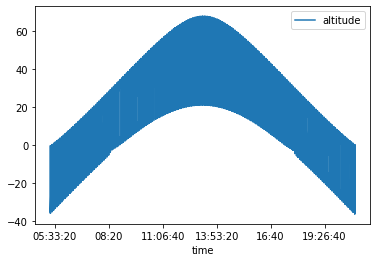

In [5]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=25)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
data[['time','altitude']].plot(x='time')

In [6]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=45)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    2.420819e+06
west     1.762418e+06
total    4.006996e+06
dtype: float64


In [7]:
angles = a.compute_angles_for_time_window(o, d1,d2,t1,t2,minutes=minutes,incline=65)
data = pd.DataFrame(angles, columns=columns)
data['total'] = data['south'] + .9 * data['west']
print(data[['south', 'west', 'total']].sum())

south    2.837646e+06
west     1.988996e+06
total    4.627743e+06
dtype: float64


In [8]:
dt = a.today()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['08-29', '06:30', 'RISE', '76°']
['08-29', '07:47', '13°', 'E']
['08-29', '11:10', '45°', 'SE']
['08-29', '13:11', '54°', 'S']
['08-29', '15:12', '45°', 'SW']
['08-29', '18:35', '13°', 'W']
['08-29', '19:51', 'SET', '283°']


In [9]:
dt = a.vernal_equinox()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['03-21', '07:12', 'RISE', '89°']
['03-21', '07:18', '1°', 'E']
['03-21', '10:56', '35°', 'SE']
['03-21', '13:17', '45°', 'S']
['03-21', '15:38', '36°', 'SW']
['03-21', '19:14', '1°', 'W']
['03-21', '19:23', 'SET', '271°']


In [10]:
dt = a.summer_solstice(a.current_year())
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['06-21', '05:23', 'RISE', '55°']
['06-21', '08:52', '34°', 'E']
['06-21', '11:48', '62°', 'SE']
['06-21', '13:13', '68°', 'S']
['06-21', '14:37', '62°', 'SW']
['06-21', '17:31', '34°', 'W']
['06-21', '21:00', 'SET', '305°']


In [11]:
dt = a.autumnal_equinox()
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['09-21', '06:58', 'RISE', '89°']
['09-21', '07:04', '1°', 'E']
['09-21', '10:42', '35°', 'SE']
['09-21', '13:03', '45°', 'S']
['09-21', '15:24', '35°', 'SW']
['09-21', '19:01', '1°', 'W']
['09-21', '19:07', 'SET', '271°']


In [12]:
dt = a.winter_solstice(a.current_year())
t1 = time(5,20,0)
t2 = time(21,0,0)
count, table = a.compute_table(o, dt, dt, t1, t2)
assert count == 7
for x in table:
    print(x)

['12-21', '05:27', '-34°', 'E']
['12-21', '08:49', 'RISE', '124°']
['12-21', '09:49', '8°', 'SE']
['12-21', '13:08', '21°', 'S']
['12-21', '16:27', '8°', 'SW']
['12-21', '17:27', 'SET', '236°']
['12-21', '20:49', '-34°', 'W']
